In [1]:
#### DATA Collection

import pandas_datareader as pdr


In [2]:
df = pdr.DataReader('GE', 'yahoo', start='2016-11-09', end='2022-11-09')

In [3]:
df.to_csv("GE.csv")

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-08,227.846161,225.307693,225.923080,226.307693,4657822.0,208.041977
2016-11-09,229.307693,223.615387,225.538467,227.923080,7026045.0,209.526993
2016-11-10,237.230774,229.461533,229.615387,233.923080,10572224.0,215.042755
2016-11-11,236.692307,233.615387,234.538467,236.230774,5552612.0,217.164139
2016-11-14,237.307693,234.538467,236.461533,234.692307,4906265.0,215.749893


In [5]:
df1=df.reset_index()['Close']
df1.shape

(1512,)

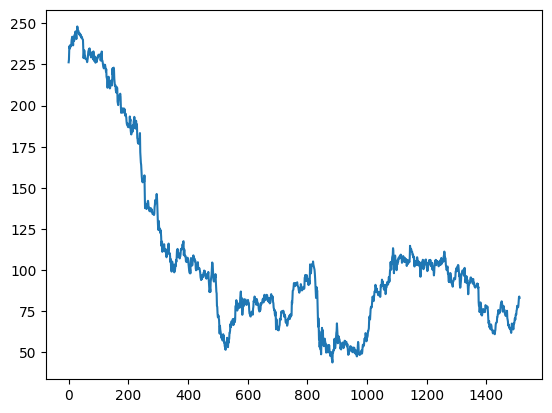

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1.shape

(1512, 1)

In [10]:
#spliting data into training and testing
training_size=int(len(df1)*0.70)
test_size = len(df1) - training_size
train_data,test_data = df1[:training_size,:],df1[training_size:,:]

In [11]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step =100
X_train, Y_train = create_dataset(train_data,time_step)
X_test, Y_test = create_dataset(test_data,time_step)

In [13]:
print(X_test)

[[0.21552049 0.22727616 0.23080287 ... 0.31270066 0.31544364 0.31152507]
 [0.22727616 0.23080287 0.21943906 ... 0.31544364 0.31152507 0.29428344]
 [0.23080287 0.21943906 0.20337299 ... 0.31152507 0.29428344 0.28566261]
 ...
 [0.11819342 0.1233365  0.1046744  ... 0.16795904 0.16399152 0.16879173]
 [0.1233365  0.1046744  0.10815211 ... 0.16399152 0.16879173 0.18196788]
 [0.1046744  0.10815211 0.10692756 ... 0.16879173 0.18196788 0.19367456]]


In [14]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
### Create LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2022-11-22 19:07:27.539258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 19:07:27.952313: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-22 19:07:28.971808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-22 19:07:28.971891: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [16]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


2022-11-22 19:07:30.175952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-22 19:07:30.297187: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-22 19:07:30.297208: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-11-22 19:07:30.298309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (o

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=len(X_train),verbose=1)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.1523 - val_loss: 0.0401
Epoch 2/100
1/1 [==============================] - 1s 875ms/step - loss: 0.1142 - val_loss: 0.0254
Epoch 3/100
1/1 [==============================] - 1s 823ms/step - loss: 0.0823 - val_loss: 0.0131
Epoch 4/100
1/1 [==============================] - 1s 881ms/step - loss: 0.0536 - val_loss: 0.0042
Epoch 5/100
1/1 [==============================] - 1s 795ms/step - loss: 0.0288 - val_loss: 0.0020
Epoch 6/100
1/1 [==============================] - 1s 814ms/step - loss: 0.0123 - val_loss: 0.0121
Epoch 7/100
1/1 [==============================] - 1s 824ms/step - loss: 0.0127 - val_loss: 0.0283
Epoch 8/100
1/1 [==============================] - 1s 833ms/step - loss: 0.0268 - val_loss: 0.0292
Epoch 9/100
1/1 [==============================] - 1s 832ms/step - loss: 0.0280 - val_loss: 0.0200
Epoch 10/100
1/1 [==============================] - 1s 873ms/step - loss: 0.0189 - val_loss: 0.0104
Epoch 11/100

In [19]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

12/12 [==============================] - 0s 40ms/step


In [20]:
test_predict=scaler.inverse_transform(test_predict)
train_predict=scaler.inverse_transform(train_predict)

In [21]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

112.54952869907581

In [22]:
math.sqrt(mean_squared_error(Y_test,test_predict))

88.50762110384517

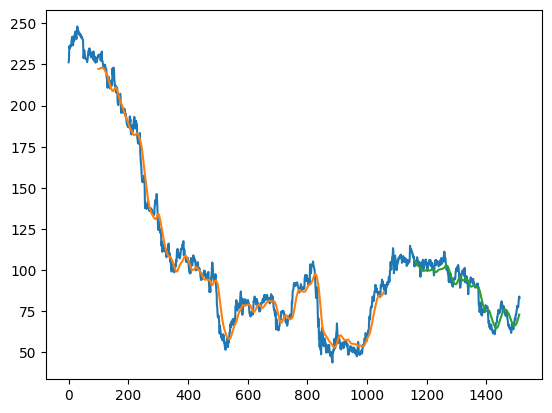

In [23]:
#plotting
lookback=100
#shift train prediction for plotting
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback,:] = train_predict
#shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+lookback*2+1:-1,:] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()